In [1]:
# pandas-or-bears classification model with CNN
# train : 500 images [pandas(250) + bears(250)] , 
# validation : 100 images [pandas(50) + bears(50)] , 300*300 pixels

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [3]:
train_dir = 'tmp/PandasBears/Train'
validation_dir = 'tmp/PandasBears/Test'
# 이미지 데이터 경로 설정
import os

base_dir = 'tmp/PandasBears'

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Test')

# Directory with our training cat/dog pictures
train_Pandas_dir = os.path.join(train_dir, 'Pandas')
train_Bears_dir = os.path.join(train_dir, 'Bears')

# Directory with our validation cat/dog pictures
validation_Pandas_dir = os.path.join(validation_dir, 'Pandas')
validation_Bears_dir = os.path.join(validation_dir, 'Bears')

train_Pandas_names = os.listdir( train_Pandas_dir )
train_Bears_names = os.listdir( train_Bears_dir )

<function matplotlib.pyplot.show(close=None, block=None)>

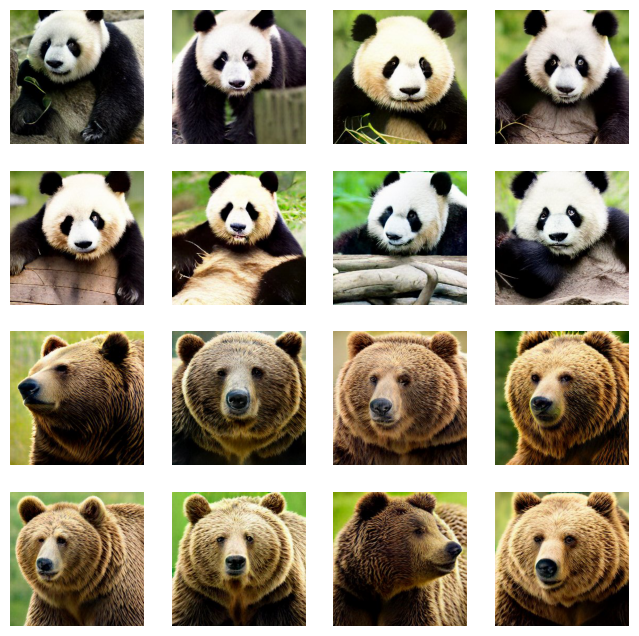

In [4]:
# 데이터 시각화 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 15  # 시작 인덱스

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)
pic_index += 8
next_Pandas_pix = [os.path.join(train_Pandas_dir, fname) 
                for fname in train_Pandas_names[pic_index-8:pic_index]]
next_Bears_pix = [os.path.join(train_Bears_dir, fname) 
                for fname in train_Bears_names[pic_index-8:pic_index]]

# print(next_horse_pix)
# print(next_human_pix)

for i, img_path in enumerate(next_Pandas_pix+next_Bears_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes

    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [6]:
# from tensorflow.Keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )
validation_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode = 'binary',
                                                    target_size =(150,150))
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    batch_size=20,
                                                    class_mode = 'binary',
                                                    target_size =(150,150))

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
# 학습
# 사전 훈련 가중치는 업데이트 하지 않고 추가 계층만 가중치 업데이트하여 학습
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 25,
            epochs = 20,
            validation_steps = 5,
            verbose = 1)

Epoch 1/20
25/25 [==============================] - 4s 69ms/step - loss: 0.6444 - accuracy: 0.6200 - val_loss: 0.5653 - val_accuracy: 0.5100
Epoch 2/20
25/25 [==============================] - 2s 68ms/step - loss: 0.4087 - accuracy: 0.9140 - val_loss: 0.2124 - val_accuracy: 0.9700
Epoch 3/20
25/25 [==============================] - 2s 68ms/step - loss: 0.1902 - accuracy: 0.9660 - val_loss: 0.0869 - val_accuracy: 0.9800
Epoch 4/20
25/25 [==============================] - 2s 67ms/step - loss: 0.0966 - accuracy: 0.9740 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 5/20
25/25 [==============================] - 2s 68ms/step - loss: 0.0337 - accuracy: 0.9960 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 6/20
25/25 [==============================] - 2s 70ms/step - loss: 0.0353 - accuracy: 0.9880 - val_loss: 0.0117 - val_accuracy: 0.9900
Epoch 7/20
25/25 [==============================] - 2s 68ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 8/20
25

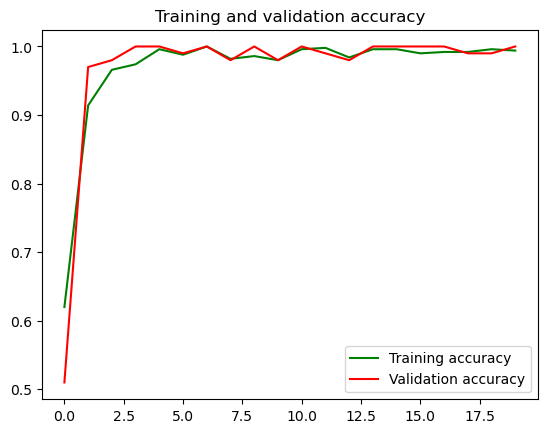

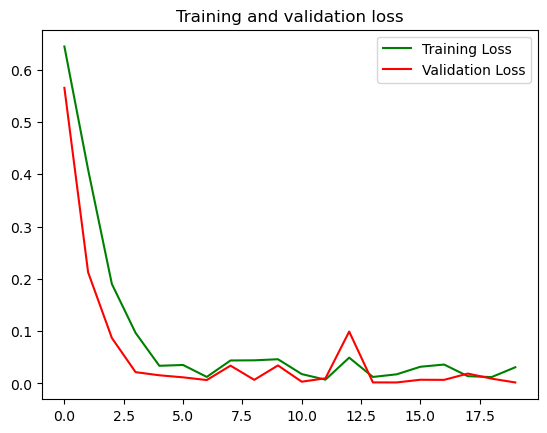

In [8]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
def image_predict(file_name):
    path = 'tmp/pandd/' + file_name + '.jpg'
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)   # 2차원 ndarray로 변환
    x = np.expand_dims(x, axis=0) # 3차원으로 변환
    images = np.vstack([x])       # 4차원으로 변환
    classes = model.predict(images, batch_size=10)
    # print(classes[0],end=' ')
    if classes[0] == 1.0:
        print(file_name ,': panda')
    else:
        print(file_name ,': bear')

image_predict('panda1')        
image_predict('panda2')
image_predict('panda3')        
image_predict('panda4')
image_predict('panda5')        
image_predict('panda6')
image_predict('bear1')
image_predict('bear2')
image_predict('bear3')
image_predict('bear4')
image_predict('bear5')
image_predict('bear6')

1/1 [==============================] - 0s 227ms/step
panda1 : panda
1/1 [==============================] - 0s 10ms/step
panda2 : panda
1/1 [==============================] - 0s 10ms/step
panda3 : panda
1/1 [==============================] - 0s 10ms/step
panda4 : panda
1/1 [==============================] - 0s 11ms/step
panda5 : bear
1/1 [==============================] - 0s 11ms/step
panda6 : panda
1/1 [==============================] - 0s 11ms/step
bear1 : bear
1/1 [==============================] - 0s 10ms/step
bear2 : bear
1/1 [==============================] - 0s 11ms/step
bear3 : bear
1/1 [==============================] - 0s 11ms/step
bear4 : bear
1/1 [==============================] - 0s 11ms/step
bear5 : bear
1/1 [==============================] - 0s 10ms/step
bear6 : bear
